In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import datasets
from tensorflow.keras import optimizers
from tensorflow.keras import losses

In [ ]:
!pip install gdown
import gdown
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# The following lines allows to exploit the GPU and make the training faster (Check in the Runtime - Change Runtime time if the GPU is set)
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

## EXERCISE 1: Design, Train and Test a CNN

Create a CNN using Keras library with the followings specifications:

> __QUESTION 1(a):__  DATASET: Load the CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class.
You can use the function datasets.cifar10.load_data() to load the dataset after importing the keras dataset with the command: from tensorflow.keras import datasets. Split the dataset in train and test set

> __QUESTION 1(b):__  Plot some samples in the dataset to visualize the kind of data

> __QUESTION 1(b):__  Build and compile a CNN model composed with:
* Conv2D with 32 filters, kernel size 3X3, activation function relu
* MaxPooling 2D with kernel size 2x2
* Conv2D with 64 filters kernel size 3X3, activation function relu
* MaxPooling 2D with kernel size 2x2
* Conv2D with 64 filters kernel size 3X3, activation function relu
* Flatten layer
* Dense layer with 64 neurons and activation function relu
* Final Dense layer for returning 10 classes
* adam as optmizer


> __QUESTION 1(c):__ Train and test on the CIFAR10 dataset with 10 epochs to check the performance

> __QUESTION 1(d):__ Compute the confusion matrix

> __QUESTION 1(e):__ : Test your model on new images about the available class that you can download from the web.

In [ ]:
(x_train, y_train), (x_test, y_test)=datasets.cifar10.load_data()
print('Lunghezza train set: ',len(x_train))
print('Lunghezza test set: ',len(x_test))

170498071/170498071 [==============================] - 3s 0us/step
Lunghezza train set:  50000
Lunghezza test set:  10000


In [ ]:
batch_size=100

train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

validation_dataset,train_dataset=keras.utils.split_dataset(train_dataset,left_size=0.2)

train_dataset=train_dataset.batch(batch_size)
validation_dataset=validation_dataset.batch(batch_size)
test_dataset=test_dataset.batch(batch_size)

[4]


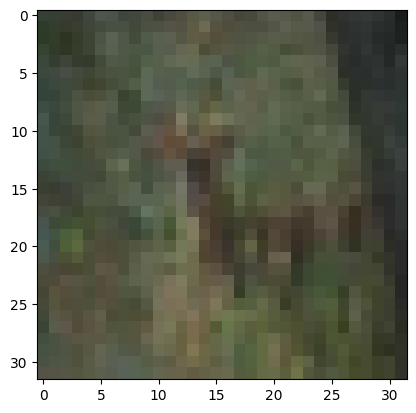

In [ ]:
plt.imshow(x_train[10])
print(y_train[10])

In [ ]:
train_ds_iterator = train_dataset.as_numpy_iterator()
batch = train_ds_iterator.next()
print(batch[0].shape)
print(batch[1].shape)

(100, 32, 32, 3)
(100, 1)


In [ ]:
validation_ds_iterator = validation_dataset.as_numpy_iterator()
batch = validation_ds_iterator.next()
print(batch[0].shape)
print(batch[1].shape)

(100, 32, 32, 3)
(100, 1)


In [ ]:
test_ds_iterator = test_dataset.as_numpy_iterator()
batch = test_ds_iterator.next()
print(batch[0].shape)
print(batch[1].shape)

(100, 32, 32, 3)
(100, 1)


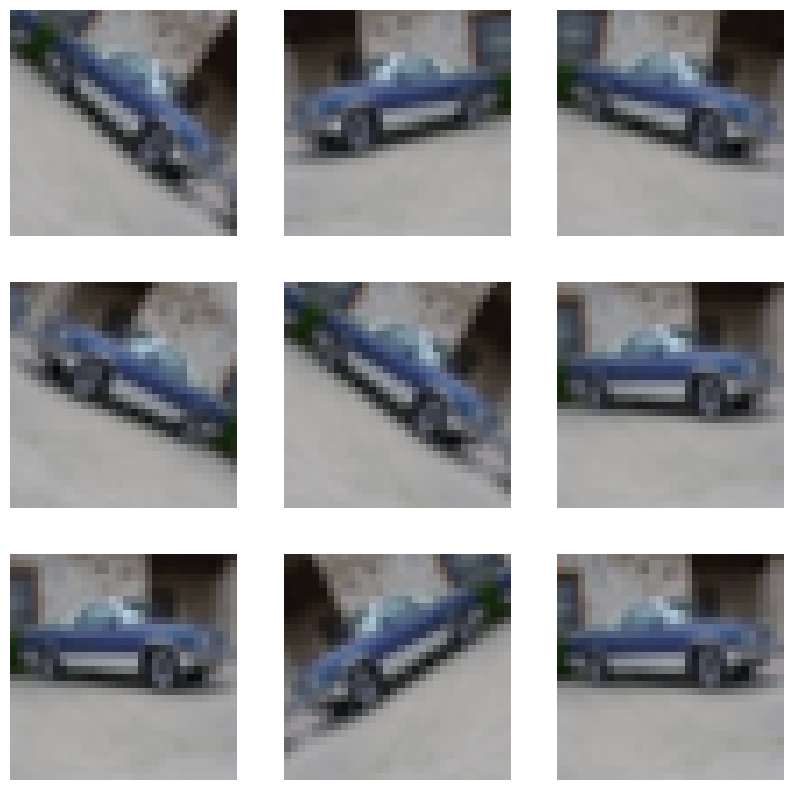

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
train_ds = train_dataset.map(lambda x,y: (x/255, y))
val_ds = validation_dataset.map(lambda x,y: (x/255, y))
test_ds=test_dataset.map(lambda x,y: (x/255, y))

train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)

train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)
test_ds=test_ds.prefetch(tf.data.AUTOTUNE)

In [ ]:
print(train_ds)
print(val_ds)
print(test_ds)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.uint8, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.uint8, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.uint8, name=None))>


In [ ]:
model=models.Sequential()

model.add(layers.Conv2D(32, (3, 3), 1, activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
#model.add(layers.Softmax())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

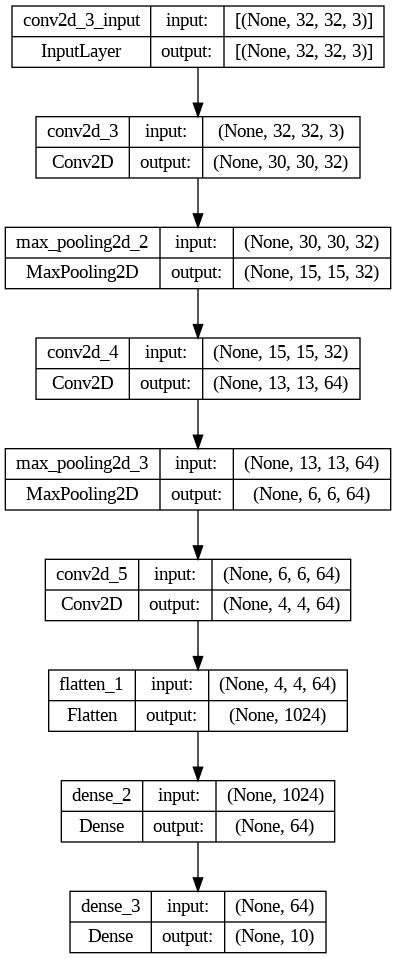

In [ ]:
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 20
#from_logits=True
model.compile(
    optimizer='adam',
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [ ]:
hist = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
    batch_size=batch_size
)

Epoch 1/20
400/400 [==============================] - 13s 24ms/step - loss: 1.8164 - accuracy: 0.3334 - val_loss: 1.5665 - val_accuracy: 0.4144
Epoch 2/20
400/400 [==============================] - 6s 15ms/step - loss: 1.4879 - accuracy: 0.4624 - val_loss: 1.3604 - val_accuracy: 0.5065
Epoch 3/20
400/400 [==============================] - 6s 14ms/step - loss: 1.3571 - accuracy: 0.5151 - val_loss: 1.2534 - val_accuracy: 0.5488
Epoch 4/20
400/400 [==============================] - 5s 12ms/step - loss: 1.2882 - accuracy: 0.5432 - val_loss: 1.2016 - val_accuracy: 0.5749
Epoch 5/20
400/400 [==============================] - 6s 15ms/step - loss: 1.2258 - accuracy: 0.5683 - val_loss: 1.1404 - val_accuracy: 0.5965
Epoch 6/20
400/400 [==============================] - 6s 15ms/step - loss: 1.1936 - accuracy: 0.5783 - val_loss: 1.1133 - val_accuracy: 0.6100
Epoch 7/20
400/400 [==============================] - 5s 12ms/step - loss: 1.1524 - accuracy: 0.5939 - val_loss: 1.0828 - val_accuracy: 0.620

In [ ]:
hist.history

{'loss': [1.816422462463379,
  1.4878816604614258,
  1.3571237325668335,
  1.2881975173950195,
  1.225824236869812,
  1.1935683488845825,
  1.1524229049682617,
  1.1246367692947388,
  1.0948749780654907,
  1.076245903968811,
  1.0581424236297607,
  1.0401312112808228,
  1.0145245790481567,
  1.0028321743011475,
  0.9840724468231201,
  0.9805896282196045,
  0.9602474570274353,
  0.9490936398506165,
  0.9375529289245605,
  0.9323011636734009],
 'accuracy': [0.33340001106262207,
  0.46242499351501465,
  0.5151000022888184,
  0.5432249903678894,
  0.568274974822998,
  0.5783249735832214,
  0.5939249992370605,
  0.602400004863739,
  0.6126000285148621,
  0.6214249730110168,
  0.6280999779701233,
  0.6305750012397766,
  0.64205002784729,
  0.6458749771118164,
  0.6535000205039978,
  0.6552749872207642,
  0.6613249778747559,
  0.6673250198364258,
  0.6739500164985657,
  0.6743000149726868],
 'val_loss': [1.5665347576141357,
  1.3603723049163818,
  1.2534236907958984,
  1.2016021013259888,
  1

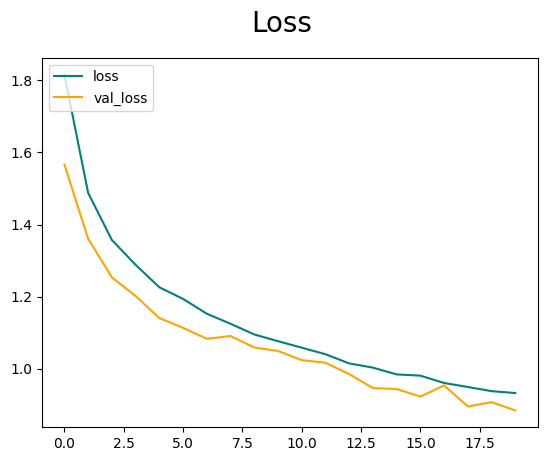

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

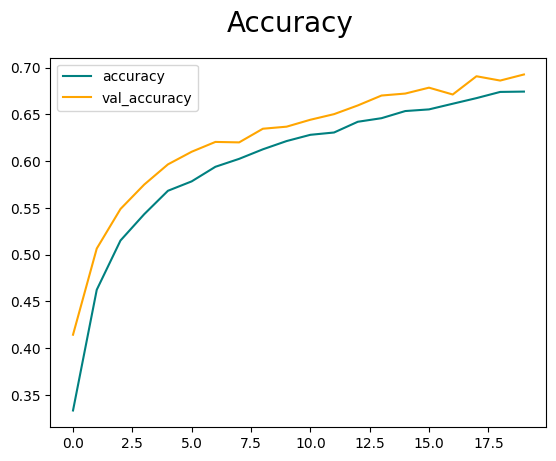

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
predicted=model.predict(test_ds)
print(predicted)

100/100 [==============================] - 0s 2ms/step
[[ 0.21167907 -0.76604784  0.19910915 ... -3.4653714   0.5305522
  -0.2872339 ]
 [ 6.1613503   8.623516    1.421783   ... -3.8442607  10.161645
   5.3449783 ]
 [ 2.2895994   4.530638   -0.9124279  ... -1.0309244   4.9086757
   3.0188143 ]
 ...
 [-2.35285    -1.7779362   1.3846054  ...  4.9004865  -1.9883357
  -1.2841991 ]
 [ 3.8055294   2.8940287  -0.33548537 ...  1.3263732  -2.047401
   0.8208477 ]
 [-1.5890133  -1.966401    2.167574   ...  8.864898   -6.2988896
  -2.103575  ]]


In [ ]:
p=[]
for i in predicted:
  p.append(np.argmax(i))

confusionmatrix=tf.math.confusion_matrix(y_test,p)
print(confusionmatrix)

tf.Tensor(
[[714  28  22  28  11   8   4  13  96  76]
 [ 18 807   0   7   2   1   7   1  19 138]
 [ 89  13 430  90 110  68  98  61  16  25]
 [ 14  17  24 564  61 146  99  32  18  25]
 [ 28  10  35  66 610  29 105  97  15   5]
 [ 15  10  20 212  42 574  45  58   3  21]
 [  6   8  18  65  28  15 831   3   5  21]
 [ 17   7  13  60  51  65  13 729   1  44]
 [ 68  38   4  24   3   8   8   2 802  43]
 [ 29 107   5  18   5   6  15   5  23 787]], shape=(10, 10), dtype=int32)


In [ ]:
!mkdir -p test_images
!wget 'https://howtodrawforkids.com/wp-content/uploads/2022/12/how-to-draw-an-airplane.jpg' -O test_images/0_airplane.jpg
!wget 'https://www.autotecnica.org/wp-content/uploads/2017/12/160915_Fiat_Panda_001.jpg' -O test_images/1_automobile.jpg
!wget 'https://www.thespruce.com/thmb/Dig93jX9tsU_Dztb5ULytD4L-NE=/3209x0/filters:no_upscale():max_bytes(150000):strip_icc()/bird-idioms-explained-386739-hero-6537ae1e68f6472ca71658c8c9eade3d.jpg' -O test_images/2_bird.jpg
!wget 'https://www.thesprucepets.com/thmb/uQnGtOt9VQiML2oG2YzAmPErrHo=/5441x0/filters:no_upscale():strip_icc()/all-about-tabby-cats-552489-hero-a23a9118af8c477b914a0a1570d4f787.jpg' -O test_images/3_cat.jpg
!wget 'https://dep.nj.gov/wp-content/uploads/njfw/deer_bill_klimas_crab_claw_8-scaled.jpg' -O test_images/4_deer.jpg
!wget 'https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Pomeranian.JPG/640px-Pomeranian.JPG' -O test_images/5_dog.jpg
!wget 'https://images.photowall.com/products/43025/red-frog.jpg?h=699&q=85' -O test_images/6_frog.jpg
!wget 'https://static-www.cavallomagazine.it/wp-content/2019/06/19040912/image-653x367.jpg' -O test_images/7_horse.jpg
!wget 'https://upload.wikimedia.org/wikipedia/commons/b/b7/Costa_Concordia_in_Palma%2C_Majorca%2C_Spain.JPG' -O test_images/8_ship.jpg
!wget 'https://cdn.britannica.com/17/126517-050-9CDCBDDF/semi-semitrailer-truck-tractor-highway.jpg' -O test_images/9_truck.jpg

--2023-05-27 15:27:19--  https://howtodrawforkids.com/wp-content/uploads/2022/12/how-to-draw-an-airplane.jpg
Resolving howtodrawforkids.com (howtodrawforkids.com)... 148.72.119.142
Connecting to howtodrawforkids.com (howtodrawforkids.com)|148.72.119.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29277 (29K) [image/jpeg]
Saving to: ‘test_images/0_airplane.jpg’

test_images/0_airpl 100%[===================>]  28.59K  --.-KB/s    in 0s      

2023-05-27 15:27:19 (245 MB/s) - ‘test_images/0_airplane.jpg’ saved [29277/29277]

--2023-05-27 15:27:19--  https://www.autotecnica.org/wp-content/uploads/2017/12/160915_Fiat_Panda_001.jpg
Resolving www.autotecnica.org (www.autotecnica.org)... 194.76.118.60
Connecting to www.autotecnica.org (www.autotecnica.org)|194.76.118.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 325384 (318K) [image/jpeg]
Saving to: ‘test_images/1_automobile.jpg’

test_images/1_autom 100%[===================>] 317.76

In [ ]:
image_size = (32,32)

fpath=['test_images/0_airplane.jpg',
       'test_images/1_automobile.jpg',
        'test_images/2_bird.jpg',
        'test_images/3_cat.jpg',
        'test_images/4_deer.jpg',
        'test_images/5_dog.jpg',
       'test_images/6_frog.jpg',
       'test_images/7_horse.jpg',
       'test_images/8_ship.jpg',
       'test_images/9_truck.jpg']
k=0
for i in fpath:
  img = cv2.imread(i, cv2.IMREAD_COLOR)
  rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  resize = tf.image.resize(rgb_img, image_size)
  #plt.imshow(resize.numpy().astype(int))
  #plt.show()
  yhat = model.predict(np.expand_dims(resize/255, 0))
  #print(yhat)
  print(k==np.argmax(yhat))

1/1 [==============================] - 0s 169ms/step
True
1/1 [==============================] - 0s 19ms/step
False
1/1 [==============================] - 0s 18ms/step
True
1/1 [==============================] - 0s 17ms/step
False
1/1 [==============================] - 0s 17ms/step
False
1/1 [==============================] - 0s 18ms/step
False
1/1 [==============================] - 0s 19ms/step
False
1/1 [==============================] - 0s 17ms/step
False
1/1 [==============================] - 0s 19ms/step
True
1/1 [==============================] - 0s 17ms/step
False
